<a href="https://colab.research.google.com/github/yuna1998/statistic-class/blob/main/pivot_2021_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Data Wrangling (tidyr)

In [1]:
##Pivoting : one variable might be spread across multiple columns(use pivot_longer())

In [2]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [5]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [6]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [8]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [9]:
table4b

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


In [ ]:
##pivot_longer
## one variable might be spread across multiple columns
## apply pivot_longer() to table4a

In [11]:
table4a %>%
    pivot_longer(c('1999','2000'), names_to = "year", values_to= "cases")

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


In [12]:
## apply it to table 4b

In [13]:
table4b %>%
    pivot_longer(c('1999','2000'), names_to= "year",values_to="population")

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


In [14]:
## join two tables

In [15]:
tidy4a <- table4a %>%
    pivot_longer(c('1999','2000'), names_to = 'year', values_to='cases')

tidy4b <- table4b %>%
    pivot_longer(c('1999','2000'), names_to='year',values_to='population')

left_join(tidy4a, tidy4b)

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
##left one is the key

In [16]:
## What is right_join? try

In [17]:
right_join(tidy4a, tidy4b)

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [18]:
##pivot_wider()
## one observation might be scattered across multiple rows

In [19]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [20]:
table2 %>% pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [21]:
table2 %>% pivot_wider(names_from = country, values_from = count)

year,type,Afghanistan,Brazil,China
<int>,<chr>,<int>,<int>,<int>
1999,cases,745,37737,212258
1999,population,19987071,172006362,1272915272
2000,cases,2666,80488,213766
2000,population,20595360,174504898,1280428583


In [22]:
##Separating and Uniting

In [24]:
##separate()
## one column contains two variables

In [25]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [27]:
table3 %>% separate(rate,into=c("cases",'population'))

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [28]:
##unite()
## single variable is spread across multiple columns

In [29]:
table5

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


In [31]:
table5 %>%
    unite(new, century, year, sep = "")

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [32]:
##functional programming

In [34]:
df <- tibble(
    a = rnorm(10),
    b = rnorm(10),
    c = rnorm(10),
    d = rnorm(10)
)

In [35]:
median(df$a)

[1] 0.1495265

In [36]:
median(df$b)

[1] 0.2798827

In [37]:
median(df$c)

[1] 0.005271018

In [38]:
median(df$d)

[1] 0.3950123

In [39]:
output <- vector('double', ncol(df)) #1. output
for (i in seq_along(df)){            #2. sequence
    output[[i]] <- median(df[[i]])   #3 : body
}
output

[1] 0.149526460 0.279882678 0.005271018 0.395012272

In [41]:
output <- c()
for (i in seq_along(df)){
    output <- c(output, median(df[[i]]))
}

output

[1] 0.149526460 0.279882678 0.005271018 0.395012272

In [42]:
install.packages("rbenchmark")
library(rbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
simple1 <- function(n){
    output<- vector("double", n)
    for (i in 1:n)
        output[i] = i
        return(output)
}

simple2 <- function(n){
    output <- c()
    for (i in 1:n)
        output = c(output,i)
        return(output)
}

In [47]:
simple1(3)

[1] 1 2 3

In [49]:
simple2(3)

[1] 1 2 3

In [50]:
benchmark("fc1" = simple1(1000),
            "fc2" = simple2(1000),
            replications = 100,
            columns = c('test', "elapsed","replications"))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.007,100
2,fc2,0.188,100


In [51]:
##for_loops vs functional
## possible to wrap up for loops in a function

In [53]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-1.8974968,-1.3793409,0.30400096,-0.4162038
-0.4877701,-0.5399648,-1.24513774,1.2571713
-0.2118504,1.1280201,-0.50410834,0.2785720
-0.2059489,0.1049872,-0.21686962,0.3005518
1.1914400,1.9556970,1.33670799,-1.1609989
1.5108314,1.1980829,0.21349183,1.0271943
-0.8733313,0.4547781,0.08906235,-1.9934804
0.5050018,1.7788764,-0.07852032,0.4894728
1.0337686,-0.1404621,-0.20503679,0.6539029


In [54]:
col_mean <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- mean(df[[i]])
  }
  output
}

col_median <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- median(df[[i]])
  }
  output
}

col_sd <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- sd(df[[i]])
  }
  output
}

col_mean(df)

[1] 0.164963536 0.370818150 0.002850845 0.164024652

In [55]:
##can make function as a variable

In [56]:
col_summary <- function(df, fun){
    out <- vector("double", length(df))
    for( i in seq_along(df)){
        out[i] <- fun(df[[i]])
    }
    out
}
col_summary(df, median)

[1] 0.149526460 0.279882678 0.005271018 0.395012272

In [57]:
## the map function(purrr)
## the purrr package provides a family of functions for looping patterns over a vector remind apply()

In [58]:
str(df)

tibble [10 × 4] (S3: tbl_df/tbl/data.frame)
 $ a: num [1:10] -1.897 -0.488 -0.212 -0.206 1.191 ...
 $ b: num [1:10] -1.379 -0.54 1.128 0.105 1.956 ...
 $ c: num [1:10] 0.304 -1.245 -0.504 -0.217 1.337 ...
 $ d: num [1:10] -0.416 1.257 0.279 0.301 -1.161 ...


In [59]:
df %>% map_dbl(mean)

a           b           c           d 
0.164963536 0.370818150 0.002850845 0.164024652

In [60]:
df %>% map_dbl(median)

a           b           c           d 
0.149526460 0.279882678 0.005271018 0.395012272

In [61]:
mtcars %>% split(.$cyl)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


In [62]:
## can define a function in map

In [63]:
mtcars %>% split(.$cyl) %>% map(function(df) lm(mpg ~ wt, data = df))

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [64]:
f1 <- function(df){
    lm(mpg ~ wt, data = df)
}

mtcars %>% split(.$cyl) %>% map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [65]:
mtcars %>% split(.$cyl) %>% map(~lm(mpg ~ wt, data = .))

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [66]:
##extract component

In [67]:
mtcars %>% split(.$cyl) %>%
    map(~lm(mpg ~ wt, data = .)) %>%
    map(summary) %>%
    map_dbl(~.$r.squared)

4         6         8 
0.5086326 0.4645102 0.4229655

In [69]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) %>% 
  map_dbl('r.squared')


4         6         8 
0.5086326 0.4645102 0.4229655

In [70]:
## can also use an integer to select elements by position

In [71]:
x<- list(list(1,2,3), list(4,5,6), list(7,8,9))

In [72]:
x

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2

[[1]][[3]]
[1] 3


[[2]]
[[2]][[1]]
[1] 4

[[2]][[2]]
[1] 5

[[2]][[3]]
[1] 6


[[3]]
[[3]][[1]]
[1] 7

[[3]][[2]]
[1] 8

[[3]][[3]]
[1] 9

In [73]:
x %>% map_dbl(2)

[1] 2 5 8

In [74]:
## functional programming is memory efficiency by not saving internal calculations understand if i get used to it

In [75]:
n_len = 10

In [76]:
rep(10, n_len) %>% map(~rnorm(.))

[[1]]
 [1] -2.1012712 -1.5776090  0.5033250 -1.0983972 -1.5194735  1.4960153
 [7]  1.4594373 -0.2996568  1.8038413 -0.4984353

[[2]]
 [1]  0.6743611  0.7628739 -0.2474665 -0.2124123 -1.6855334 -0.5959964
 [7]  0.6759560  0.3398904  0.4654954 -0.1598059

[[3]]
 [1] -0.53318564  1.95521536  0.06068968 -0.36163336  2.04413994  0.24616720
 [7]  0.32558769 -0.52684556  0.33010521  0.63521525

[[4]]
 [1] -0.06141430 -0.04997307 -1.23072117  0.30531442  1.69094084 -0.45295476
 [7] -0.04030342  0.01992343  0.45185765  1.32970787

[[5]]
 [1]  0.1448698 -1.8370154 -0.3142948  0.5432297 -0.2838182 -0.3531473
 [7] -0.9080389 -0.7228322  0.5814440 -1.3069882

[[6]]
 [1]  0.08844927  0.70418774 -1.38776690  0.11597273 -0.35325929 -0.62252766
 [7] -0.68984897 -0.23947330  1.24278236 -0.59514153

[[7]]
 [1]  0.74409739  1.27397252  0.01678317 -0.33944214 -0.05620349  2.97363198
 [7] -0.47821773 -0.56905004 -0.84526067 -1.19851739

[[8]]
 [1]  0.9426338  0.1204733  1.4903396 -0.1760191  0.8446138 -0.5163658
 [7]  0.2155029  1.1743989  0.5159688 -1.1949614

[[9]]
 [1]  0.441881842 -0.382585755  0.459004034 -0.309276480 -1.074331279
 [6]  0.008543259  0.396204495 -0.569406992  0.212888856  0.640743368

[[10]]
 [1] -1.4801874 -0.5241173  0.9566110  0.4187359  1.6744348  0.5478050
 [7]  0.6806883 -0.2277790 -1.1111474 -0.7173887

In [78]:
df2 <- vector(mode = "list", length = n_len)

for (i in 1:n_len)
    df2[[i]] <- rnorm(10)

df2

[[1]]
 [1] -0.5776001  0.4319310 -1.9649956 -0.5418513 -0.3006666 -0.3886596
 [7]  1.2239841 -1.3894169 -1.0867356  0.5398127

[[2]]
 [1]  0.9363022  0.1453176 -0.3683260  1.9727041  0.1511598 -1.4578586
 [7] -0.1601350  0.6123483  1.1459425  0.8746060

[[3]]
 [1] -0.5684944 -0.4290683  0.8567029 -0.4035696  0.2169837  0.5007101
 [7] -0.8410584 -0.8096913  1.3818203 -0.1479006

[[4]]
 [1]  0.3692737 -0.5938945  1.4089677 -0.6313663 -0.9781953  0.5216885
 [7] -0.1436455  0.3606579 -0.9538266 -0.9346919

[[5]]
 [1] -0.8670004  0.5359015 -1.9769384  1.2198358 -1.1610443 -0.3739991
 [7]  0.8107760  0.6714483 -0.3739079  1.2718223

[[6]]
 [1] -0.625672489 -0.500452899 -1.056892268 -0.923778180  0.719906074
 [6] -0.002481234 -1.399873768  0.598569710  1.310040777 -0.175474527

[[7]]
 [1]  0.53397817  1.06342250  1.32811319  0.01496168  1.49922440 -1.22048318
 [7] -0.79458973 -0.88730241 -2.66897107  0.27992687

[[8]]
 [1]  1.1813946  0.3554932  2.6859784  1.1773440 -2.5988289 -0.3432736
 [7] -1.8587275 -0.1540516  0.3459946 -1.5164803

[[9]]
 [1]  0.04206339 -1.05829485 -2.37028896 -0.63503954  1.22794871 -1.79652104
 [7] -1.18244463  1.77237193  1.74950106  1.14948746

[[10]]
 [1] -1.24410935  0.32042941  1.40913090 -0.62515067  0.60979975 -0.41960087
 [7]  1.28845399  1.03005170  0.30315661  0.06996007

In [79]:
gen1 <- function(n_len){
    rep(10, n_len) %>% map(~rnorm(.))
}

In [87]:
gen2 <- function(n_len){
    df2 <- vector(mode = "list", length = n_len)
    for (i in n_len)
        df2[[i]] <- rnorm(10)
    df2}

In [82]:
gen3 <- function(n_len){
    lapply(rep(10, n_len), rnorm)
}

In [83]:
gen1(5)

[[1]]
 [1]  0.09860184  0.34642043 -0.66585503 -0.28407404 -0.50908946  0.93825740
 [7]  1.15239447  0.36361894 -0.17644150  0.40648418

[[2]]
 [1] -1.97982118 -0.87833830  0.21613450 -0.06110291  1.09683377 -0.42698346
 [7]  1.37575636 -0.74784474  1.53868901  1.51397305

[[3]]
 [1]  0.80631856 -1.00895786  0.14976975 -0.29299450  0.20904361  0.54606918
 [7] -0.28889584  0.03035096 -1.19937034  1.11537991

[[4]]
 [1]  0.74043116  1.30286902  0.42908102  0.72255719  0.22533107  0.02242318
 [7] -0.47705121 -1.81425716 -1.10580501  1.31472427

[[5]]
 [1]  1.4268067 -1.3883830 -1.2008765  0.5585290  0.4293354 -0.5606171
 [7]  2.2993714 -0.9033904 -1.5117092 -1.0117066

In [88]:
benchmark("fc1"=gen1(1000),
          "fc2"=gen2(1000),
          "fc3"=gen3(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.642,100
2,fc2,0.001,100
3,fc3,0.413,100


In [89]:
##something useful

In [90]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


In [93]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


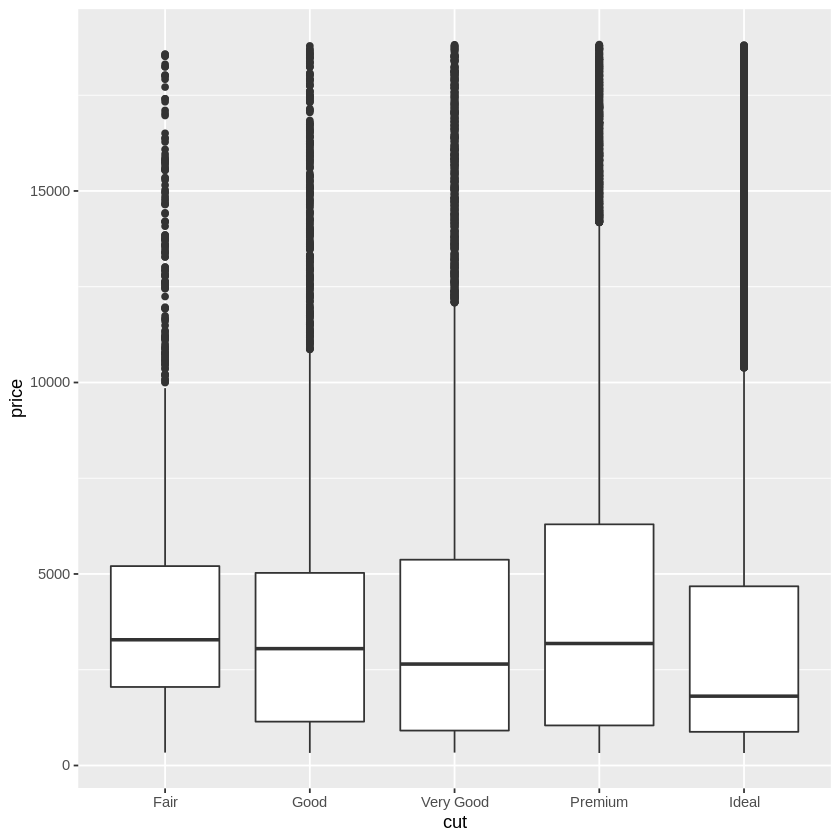

In [91]:
diamonds %>% ggplot(aes(cut, price)) + geom_boxplot()

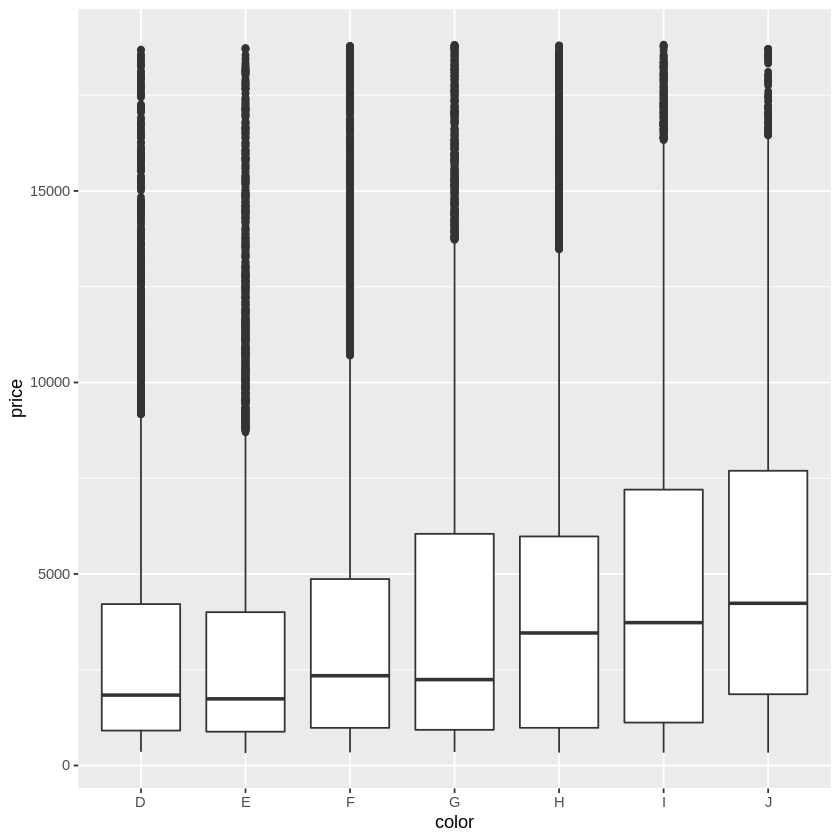

In [95]:
diamonds %>% ggplot(aes(color, price)) + geom_boxplot()

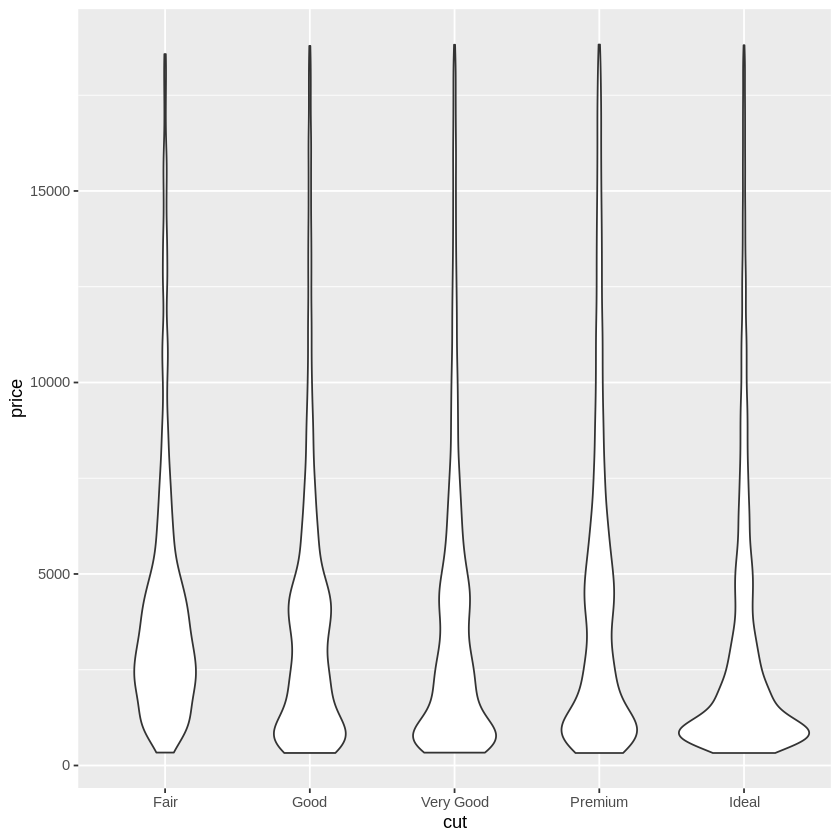

In [96]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin()

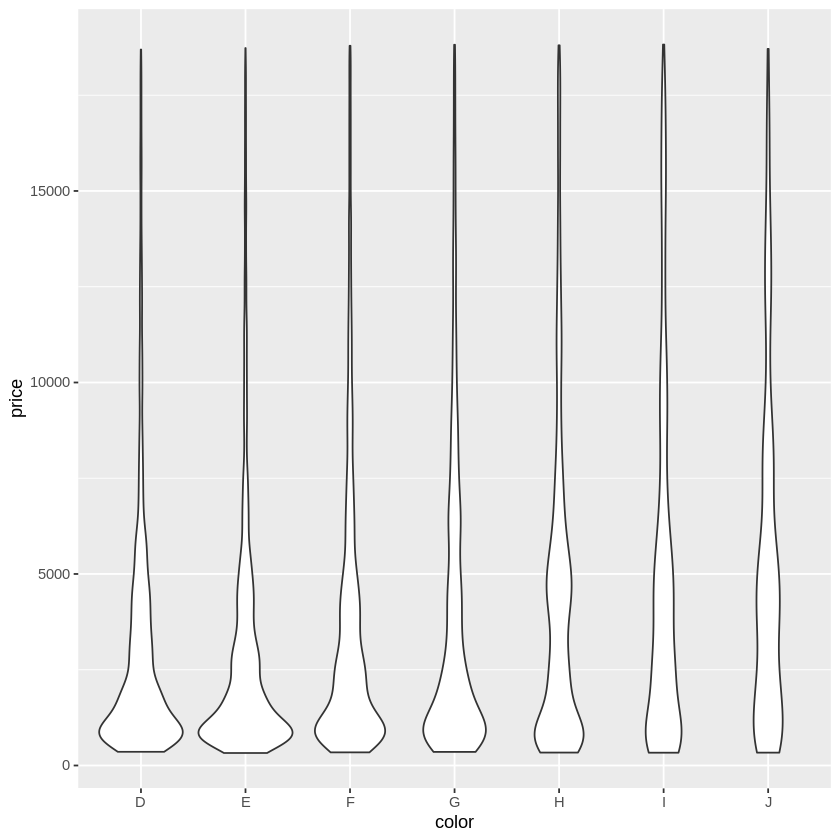

In [97]:
diamonds %>% ggplot(aes(color, price)) + geom_violin()